# GFR Data Generation
### _Computer Age Statistical Inference_ (CASI) Study Group
#### Author: Jim Chen

Import necessary libraries.

In [2]:
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
from scipy.stats import sem

Set up to simulate sample of the distribution of GFR function.

In [3]:
# Assign vector of frequency in distribution.
x = [1, 3, 5, 9, 8, 14, 16, 20, 31, 22, 21, 10, 17, 3, 13, 1, 3, 1, 3, 3, 1, 2, 0, 0, 1, 0, 1, 2]

In [4]:
np.random.seed(0)

Simulate sample of distribution

In [5]:
histStart = 100 - 25*3 + 1.5
gfrdata = []
for i, histCount in enumerate(x):
    for j in range(histCount):
        gfrdata.append(np.random.uniform(histStart-1.5+i*3, histStart+1.5+i*3))

In [6]:
gfrdata

[26.646440511781975,
 30.14556809911726,
 29.80829012821493,
 29.63464954899069,
 32.270964398016716,
 32.93768233919997,
 32.31276163378808,
 33.67531900234624,
 33.890988281503084,
 35.15032455647733,
 36.375175114247995,
 35.586684759258716,
 35.704133683281796,
 36.77678991487798,
 34.213108174593664,
 34.26138789910462,
 34.06065519232098,
 36.497859536643816,
 39.33447025284955,
 39.61003644474046,
 39.93585502669829,
 39.39747569265017,
 38.3844380867588,
 39.341587528859364,
 37.3548232776068,
 38.91976306398257,
 40.43005986222714,
 42.83400675114875,
 41.56554496525021,
 41.24398581997157,
 40.79366683631388,
 42.32270106830265,
 41.36845099664964,
 41.70530184660595,
 40.05636940130906,
 41.85290649122763,
 41.83628716816727,
 41.85080199062427,
 42.83124423554387,
 42.04546089731045,
 44.07852370172136,
 44.31109586139802,
 45.092893587781795,
 43.18067641488781,
 45.000300146337004,
 45.01191360885448,
 43.63114768322152,
 43.38677889296456,
 43.94628505277255,
 44.0911323

Display the mean of the sample, and the standard error of the mean.
In frequentist statistics, the standard error of the mean gives us a range of likely values of the mean based on the sample.
As noted in CASI Ch. 2, "the frequentest principle [is] to attribute for $\hat\theta$ the accuracy properties of the ensemble of $\hat\Theta$ values (Efron and Hastie 14).

In [7]:
np.mean(gfrdata), sem(gfrdata)

(53.881066282912002, 0.95202165832846308)

Plot the distribution of the simulated sample.

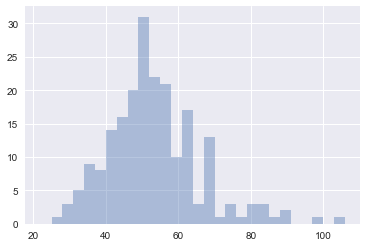

In [8]:
sb.distplot(gfrdata, kde=False, bins=range(22, 109, 3))